<a href="https://colab.research.google.com/github/martimov/MoniTARE/blob/main/Perspective_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline # Allows to render matplotlib figures directly in the notebook

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

(1080, 1920, 3)


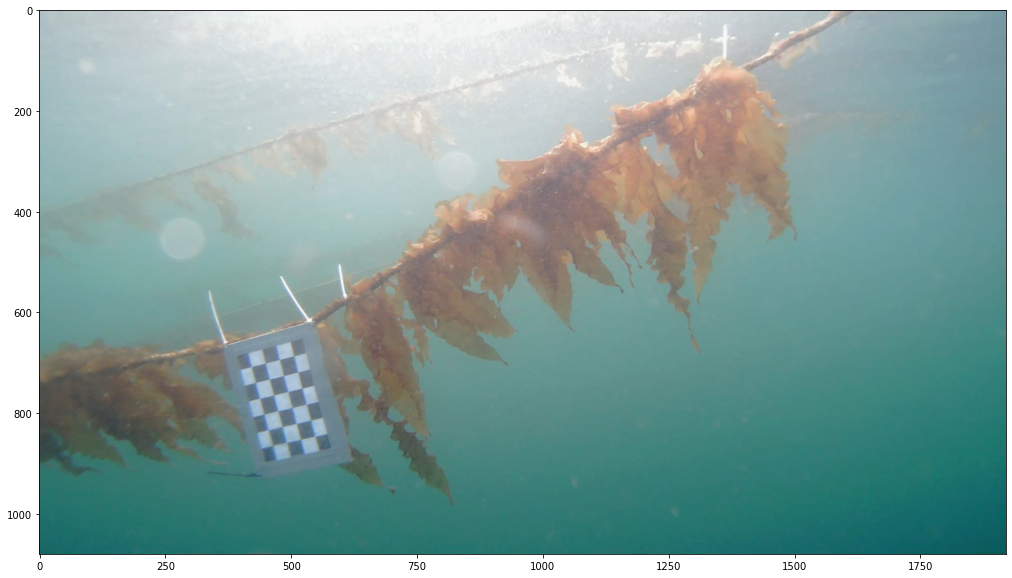

In [22]:
# Load an image and display
imgPath = '/video_BYEDP210102_2022-03-22_095346_wideshot.mp4_snapshot_00.10.663.jpg'
img = cv.imread(imgPath, cv.IMREAD_COLOR)

# Convert to grayscale
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display image
plt.imshow(img[:, :, ::-1]);
print(img.shape)

# Perspective correction

In [23]:
################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (4, 6)
frameSize = (1920, 1080)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

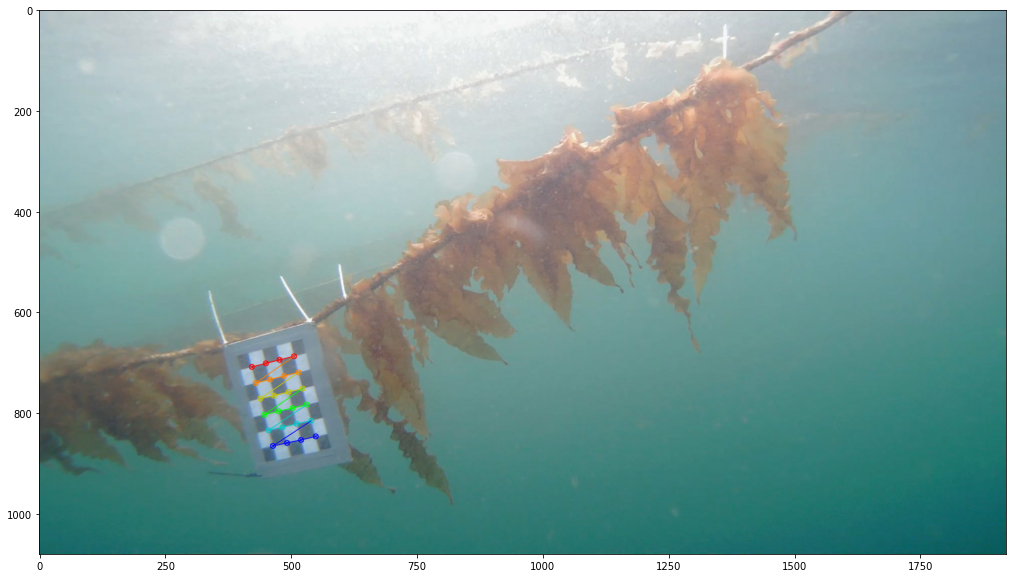

In [24]:
# Find the chess board corners
ret, corners = cv.findChessboardCorners(imgGray, chessboardSize, None)

# Copy image
imgCopy = img.copy()

# If found, add object points, image points (after refining them)
if ret == True:
  objpoints.append(objp)
  
  corners = cv.cornerSubPix(imgGray, corners, (11,11), (-1,-1), criteria)
  imgpoints.append(corners)
  # Draw and display the corners
  imgCopy = cv.drawChessboardCorners(imgCopy, chessboardSize, corners, ret)
  plt.imshow(img_corners[:, :, ::-1]);

In [11]:
print(corners)

[[[422.08246 708.2529 ]]

 [[449.6391  701.237  ]]

 [[477.4751  694.08075]]

 [[506.34476 686.9322 ]]

 [[430.10507 739.93384]]

 [[458.0033  733.0137 ]]

 [[485.82916 726.34216]]

 [[514.58264 719.02673]]

 [[438.74765 771.2406 ]]

 [[466.29062 764.83154]]

 [[494.85867 757.7877 ]]

 [[522.94604 751.2014 ]]

 [[447.16348 802.6112 ]]

 [[474.82593 796.10175]]

 [[502.79785 789.69904]]

 [[531.3163  783.1771 ]]

 [[455.4227  833.7058 ]]

 [[483.19565 827.65375]]

 [[511.30786 821.1124 ]]

 [[539.9542  814.6209 ]]

 [[464.06226 864.87213]]

 [[491.8388  859.21185]]

 [[520.003   852.8263 ]]

 [[548.57983 845.7995 ]]]


In [12]:
quadcorners = np.float32([corners[0], corners[3], corners[23], corners[20]])
print(quadcorners)

[[[422.08246 708.2529 ]]

 [[506.34476 686.9322 ]]

 [[548.57983 845.7995 ]]

 [[464.06226 864.87213]]]


# https://stackoverflow.com/questions/64825835/opencv-python-how-to-warpperspective-a-large-image-based-on-transform-inferred

In [27]:
input = np.float32([[422.08246, 708.2529], [506.34476, 686.9322], [548.57983, 845.7995], [464.06226, 864.87213]])
print(input)

[[422.08246 708.2529 ]
 [506.34476 686.9322 ]
 [548.57983 845.7995 ]
 [464.06226 864.87213]]


In [28]:
import math

In [29]:
hh, ww = img.shape[:2]

# get top and left dimensions and set to output dimensions of red rectangle
width = round(math.hypot(input[0,0]-input[1,0], input[0,1]-input[1,1]))
height = round(math.hypot(input[0,0]-input[3,0], input[0,1]-input[3,1]))
print("width:",width, "height:",height)

width: 87 height: 162


In [30]:
# set upper left coordinates for output rectangle
x = input[0,0]
y = input[0,1]

# specify output coordinates for corners of red quadrilateral in order TL, TR, BR, BL as x,
output = np.float32([[x,y], [x+width-1,y], [x+width-1,y+height-1], [x,y+height-1]])

In [31]:
# compute perspective matrix
matrix = cv.getPerspectiveTransform(input,output)
print(matrix)

[[ 1.04989699e+00 -2.91852286e-01  1.93065280e+02]
 [ 3.53966958e-01  9.29665655e-01 -8.71368588e+01]
 [ 1.51136196e-04 -6.52462034e-05  1.00000000e+00]]


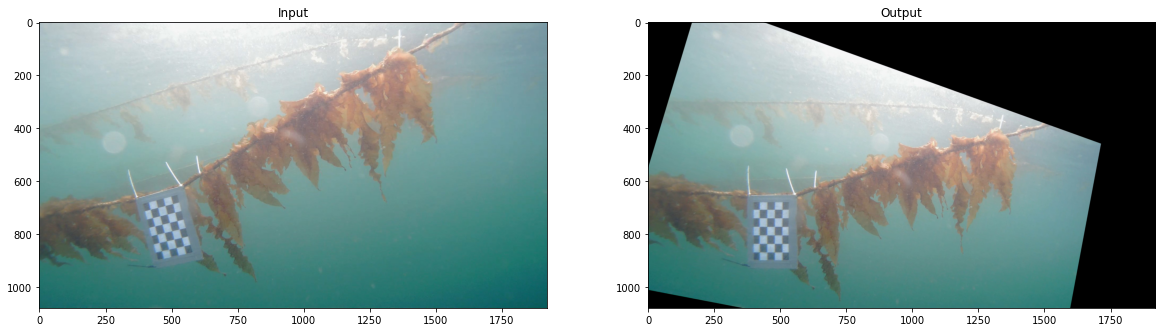

In [32]:
# do perspective transformation setting area outside input to black
# Note that output size is the same as the input image size
imgOutput = cv.warpPerspective(img, matrix, (ww,hh), cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT, borderValue=(0,0,0))

plt.subplot(121),plt.imshow(img[:, :, ::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(imgOutput[:, :, ::-1]),plt.title('Output')
plt.show()

In [33]:
# save the warped output
cv.imwrite("/video_BYEDP210102_2022-03-22_095346_wideshot.mp4_snapshot_00.10.663_warped.jpg", imgOutput)

True

## https://github.com/spmallick/learnopencv/blob/master/Homography/perspective-correction.py

In [36]:
# Destination image
size = (1920, 1080, 3)

im_dst = np.zeros(size, np.uint8)

pts_dst = np.array([[0,0], [size[0] - 1, 0], [size[0] - 1, size[1] -1], [0, size[1] - 1 ]], dtype=np.float32)

print(pts_dst)

[[   0.    0.]
 [1919.    0.]
 [1919. 1079.]
 [   0. 1079.]]


In [37]:
input = np.float32([[422.08246, 708.2529], [506.34476, 686.9322], [548.57983, 845.7995], [464.06226, 864.87213]])
print(input)

[[422.08246 708.2529 ]
 [506.34476 686.9322 ]
 [548.57983 845.7995 ]
 [464.06226 864.87213]]


In [38]:
# Calculate the homography
h, status = cv.findHomography(input, pts_dst)

print(h)

[[ 2.20039033e+01 -5.89786815e+00 -5.11027920e+03]
 [ 1.65485292e+00  6.54019102e+00 -5.33059384e+03]
 [ 1.51136156e-04 -6.52461247e-05  1.00000000e+00]]


In [39]:
m = cv.getPerspectiveTransform(input, pts_dst)

print(m)

[[ 2.20039032e+01 -5.89786813e+00 -5.11027919e+03]
 [ 1.65485290e+00  6.54019096e+00 -5.33059379e+03]
 [ 1.51136231e-04 -6.52461801e-05  1.00000000e+00]]


In [40]:
print(img.shape)

(1080, 1920, 3)


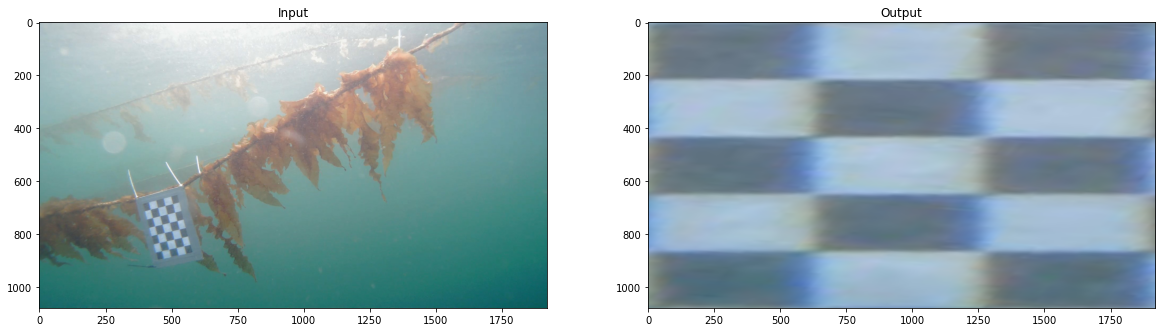

In [42]:
# Warp source image to destination
im_dst = cv.warpPerspective(img, m, size[0:2], cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT, borderValue=(0,0,0))

plt.subplot(121),plt.imshow(img[:, :, ::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(im_dst[:, :, ::-1]),plt.title('Output')
plt.show()

# https://stackoverflow.com/questions/22656698/perspective-correction-in-opencv-using-python

In [28]:
import math

In [29]:
input = np.float32([[422.08246, 708.2529], [506.34476, 686.9322], [548.57983, 845.7995], [464.06226, 864.87213]])
print(input)

[[422.08246 708.2529 ]
 [506.34476 686.9322 ]
 [548.57983 845.7995 ]
 [464.06226 864.87213]]


In [44]:
# cv.getPerspectiveTransform(	src, dst[, solveMethod]	) ->	retval
# aspect ratio image = 16:9
# aspect ratio chessboard = 4:6

ratio = (16/9)
cardH = math.sqrt((input[2][0]-input[1][0])*(input[2][0]-input[1][0])+(input[2][1]-input[1][1])*(input[2][1]-input[1][1]))
cardW = ratio*cardH;
dstcorners = np.float32([[input[0][0],input[0][1]], [input[0][0]+cardW, input[0][1]], [input[0][0]+cardW, input[0][1]+cardH], [input[0][0], input[0][1]+cardH]])

print("width:",cardW, "height:",cardH)

width: 292.2410640313452 height: 164.3855985176317


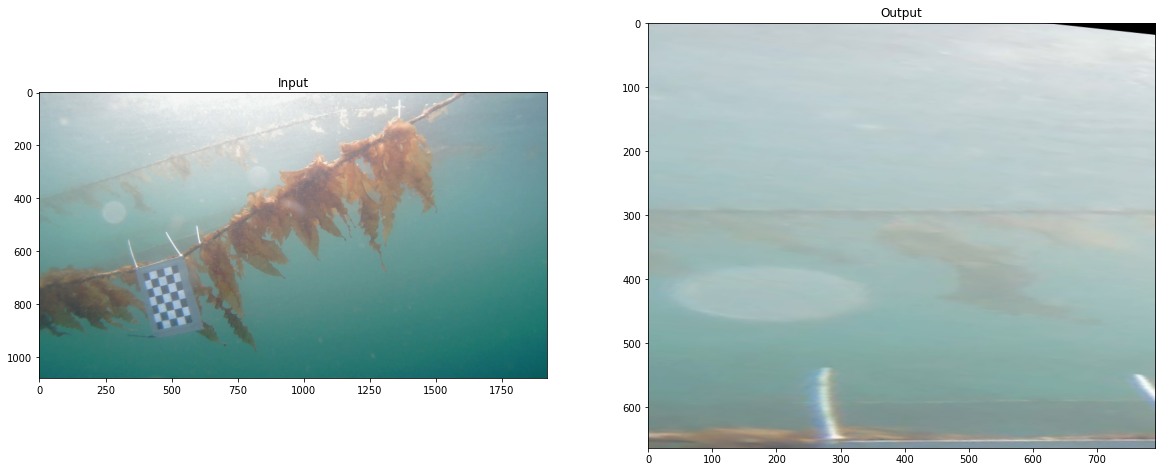

In [45]:
# cv.getPerspectiveTransform(	src, dst[, solveMethod]	) ->	retval

M = cv.getPerspectiveTransform(input, dstcorners)

offsetSize=500
transformed = np.zeros((int(cardW+offsetSize), int(cardH+offsetSize)), dtype=np.uint8);
dst = cv.warpPerspective(img, M, transformed.shape, cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT, borderValue=(0,0,0))

plt.subplot(121),plt.imshow(img[:, :, ::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst[:, :, ::-1]),plt.title('Output')
plt.show()
